In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# data set
dftrain = pd.read_csv('F:/CCEE Exam prepration/Ml Assignment/web/data/training.1600000.processed.noemoticon.csv', encoding='latin1',header=None )
dftest = pd.read_csv('F:/CCEE Exam prepration/Ml Assignment/web/data/testdata.manual.2009.06.14.csv', encoding='latin1',header=None )

In [5]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
dftrain.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
dftest.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [9]:
# Rename columns
dftrain.columns = ['Polarity', 'Post ID', 'Date_Time', 'Query', 'Author', 'Tweet']
dftrain.head()

,Polarity,Post ID,Date_Time,Query,Author,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
# Rename columns
dftest.columns = ['Polarity', 'Post ID', 'Date_Time', 'Query', 'Author', 'Tweet']
dftest.head()

,Polarity,Post ID,Date_Time,Query,Author,Tweet
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [11]:
dftest['Polarity'].unique()

array([4, 0, 2], dtype=int64)

In [12]:
dftrain.shape

(1600000, 6)

In [13]:
dftest.shape

(498, 6)

In [14]:
dftrain.isnull().sum()

Polarity     0
Post ID      0
Date_Time    0
Query        0
Author       0
Tweet        0
dtype: int64

In [15]:
dftest.isnull().sum()

Polarity     0
Post ID      0
Date_Time    0
Query        0
Author       0
Tweet        0
dtype: int64

In [16]:
#remove unnecessary columns
train = dftrain[["Polarity", "Tweet"]]

In [17]:
#remove unnecessary columns
test = dftest[["Polarity", "Tweet"]]

In [18]:
#Replace values to have -1 negative, 0 neutral, 1 postive
train["Polarity"]  = train["Polarity"].replace(4,1)
train["Polarity"]  = train["Polarity"].replace(0,-1)

In [19]:
dftest["Polarity"]  = dftest["Polarity"].replace(4,1)
dftest["Polarity"]  = dftest["Polarity"].replace(0,-1)
dftest["Polarity"]  = dftest["Polarity"].replace(2,0)

In [20]:
dftest['Polarity'].value_counts()

Polarity
 1    182
-1    177
 0    139
Name: count, dtype: int64

In [21]:
print("train: ", len(dftrain))
print("test: ", len(dftest))

train:  1600000
test:  498


In [22]:
tweets_df = pd.concat([train,dftest], axis=0)

<Axes: xlabel='Polarity', ylabel='count'>

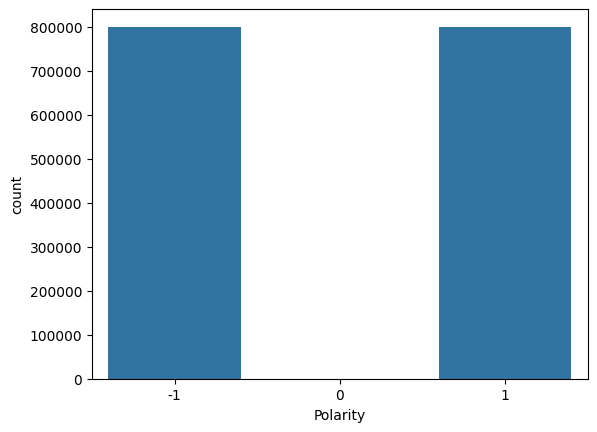

In [23]:
sns.countplot(data = tweets_df, x = "Polarity")

#Clean the text (remove hashtags, mentions, URLs, and special characters).
##Tokenize, lemmatize, and perform sentiment analysis.

In [24]:
# Ensure the necessary NLTK resources are available
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
# Define a function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

In [26]:
# Apply text cleaning to the tweet text (column 5)
tweets_df['Tweet'] = tweets_df['Tweet'].apply(clean_text)

In [27]:
# Tokenize, remove stopwords, and lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Replace 'data' with 'tweets_df' to use the correct DataFrame
tweets_df['cleaned_text'] = tweets_df['Tweet'].apply(preprocess_text)

In [28]:
tweets_df[['cleaned_text']].head()

,cleaned_text
0,awww thats bummer shoulda got david carr third...
1,upset cant update facebook texting might cry r...
2,dived many time ball managed save rest go bound
3,whole body feel itchy like fire
4,behaving im mad cant see


#Visualize trends in sentiment over time.Identify frequently mentioned topics or keywords using word clouds or topic modeling (LDA).

In [29]:
# Convert Date_Time to datetime format
dftrain['Date_Time'] = pd.to_datetime(dftrain['Date_Time'], errors='coerce')

In [30]:
# Aggregate sentiment counts by day
sentiment_trends = dftrain.groupby([pd.Grouper(key='Date_Time', freq='D'), 'Polarity']).size().unstack().fillna(0)


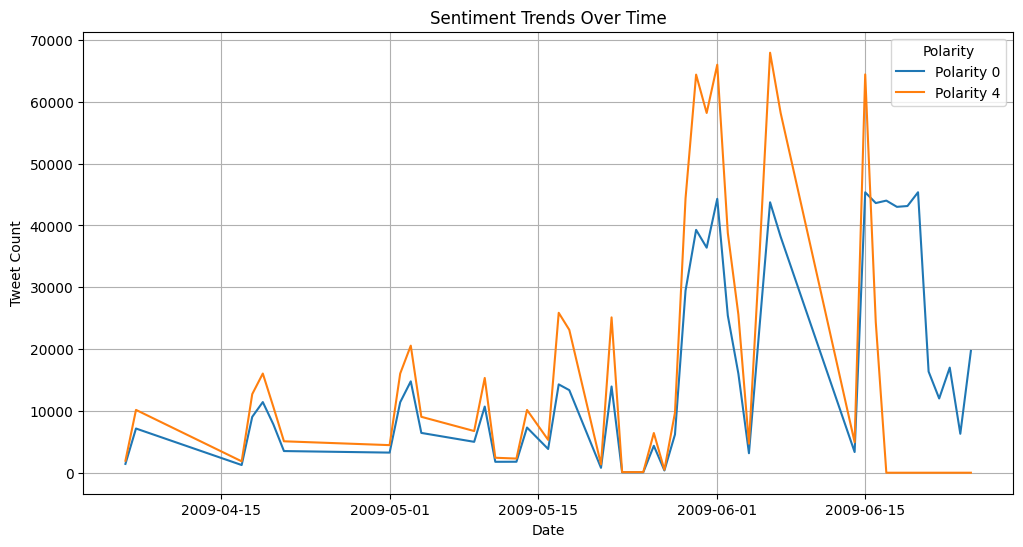

In [31]:
# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
for polarity in sentiment_trends.columns:
    plt.plot(sentiment_trends.index, sentiment_trends[polarity], label=f"Polarity {polarity}")

plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.legend(title="Polarity")
plt.grid(True)
plt.show()

# Build a sentiment classifier using a machine learning algorithm like Logistic Regression, SVM, or Random Forest.

#Evaluate the model on classification metrics (precision, recall, F1-score).

In [51]:
# Feature Extraction using Tf-IDF
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(tweets_df['cleaned_text'])
y = tweets_df['Polarity']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [53]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
Ir_model = LogisticRegression()
Ir_model.fit(X_train, y_train)
Ir_pred = Ir_model.predict(X_train)

In [55]:
# Predict on the test set
lr_preds = Ir_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, lr_preds))
print("Accuracy:", 100 * accuracy_score(y_test, lr_preds))

Logistic Regression Results:
              precision    recall  f1-score   support

          -1       0.76      0.72      0.74    159146
           0       0.00      0.00      0.00        12
           1       0.74      0.78      0.76    160942

    accuracy                           0.75    320100
   macro avg       0.50      0.50      0.50    320100
weighted avg       0.75      0.75      0.75    320100

Accuracy: 74.82755388940956


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [58]:
# Grid Search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [59]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7484422809155683


In [60]:
# Evaluate the best model
best_model = grid_search.best_estimator_
lr_preds = best_model.predict(X_test)
print("Tuned Logistic Regression Results:")
print(classification_report(y_test, lr_preds))
print("Accuracy:", 100 * accuracy_score(y_test, lr_preds))

Tuned Logistic Regression Results:
              precision    recall  f1-score   support

          -1       0.76      0.72      0.74    159146
           0       0.00      0.00      0.00        12
           1       0.74      0.78      0.76    160942

    accuracy                           0.75    320100
   macro avg       0.50      0.50      0.50    320100
weighted avg       0.75      0.75      0.75    320100

Accuracy: 74.84004998437989


In [68]:
!pip install mlflow 

Defaulting to user installation because normal site-packages is not writeable
  Using cached mlflow-2.19.0-py3-none-any.whl.metadata (30 kB)
  Using cached mlflow_skinny-2.19.0-py3-none-any.whl.metadata (31 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached alembic-1.14.0-py3-none-any.whl.metadata (7.4 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached SQLAlchemy-2.0.36-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached cloudpickle-3.1.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached databricks_sdk-0.40.0-py3-none-any.whl.metadata (38 kB)
  Using cached importlib_metadata-8.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached opentelemetry_api-1.29.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached opentelemetry_sdk-1.29.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached sqlparse-

In [69]:
import mlflow

In [ ]:
mlflow.set_experiment("Sentiment Analysis")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

with mlflow.start_run():
    mlflow.log_param("algorithm", "Logistic Regression")
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("C", 0.1)
    mlflow.log_param("solver", "liblinear")
    mlflow.log_metric("accuracy", 0.8)
    mlflow.log_metric("precision", 0.85)
    mlflow.log_metric("recall", 0.83)
    mlflow.log_metric("f1_score", 0.84)
    mlflow.log_artifact("logistic_regression_model.pkl")
    mlflow.sklearn.log_model(best_model, "logistic_regression_model")
from sklearn.metrics import classification_report   

2024/12/29 12:44:43 INFO mlflow.tracking.fluent: Experiment with name 'Sentiment Analysis' does not exist. Creating a new experiment.
2024/12/29 12:45:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run orderly-steed-727 at: http://127.0.0.1:5000/#/experiments/363365380255559485/runs/0621b18aa29144f5b61f5bd496b14a91
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/363365380255559485


In [71]:
report_dict = classification_report(y_test, lr_preds, output_dict=True)
report_dict

{'-1': {'precision': 0.761952363815693,
  'recall': 0.7184220778404735,
  'f1-score': 0.7395472186287193,
  'support': 159146.0},
 '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 12.0},
 '1': {'precision': 0.7364419039554003,
  'recall': 0.7781001851598712,
  'f1-score': 0.7566981280288108,
  'support': 160942.0},
 'accuracy': 0.7484004998437989,
 'macro avg': {'precision': 0.49946475592369777,
  'recall': 0.49884075433344827,
  'f1-score': 0.49874844888584335,
  'support': 320100.0},
 'weighted avg': {'precision': 0.7490974814064426,
  'recall': 0.7484004998437989,
  'f1-score': 0.748142742196498,
  'support': 320100.0}}

In [61]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(Ir_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Accuracy Scores: [0.7455139  0.7435895  0.7445517  0.74978991 0.74565369]
Mean Accuracy: 74.58%


In [62]:
import joblib

In [63]:
# Save the model
joblib.dump(Ir_model, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']